In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

import time

In [73]:
df = pd.read_csv('master_data_file.csv')

In [74]:
df.head()

,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpd_943P,actualdpdtolerance_344P,addres_district_368M,addres_role_871L,addres_zip_823M,...,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,totaloutstanddebtvalue_668A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,type_25L,typesuite_864L,validfrom_1069D
0,0,2019-01-03,201901,0,0,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1,-1,0,1,-1,-1
1,1,2019-01-03,201901,0,0,-1.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1,-1,0,1,-1,-1
2,2,2019-01-04,201901,0,0,3.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1,-1,0,0,0,-1
3,3,2019-01-03,201901,0,0,3.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1,-1,0,1,0,-1
4,4,2019-01-04,201901,0,1,3.0,-1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1,-1,0,1,0,-1


In [75]:
df.shape

(1526659, 469)

In [77]:
features = df.columns[5:]

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [79]:
main_feature = []

for i in range(92):
    clf = DecisionTreeClassifier(max_depth=2, random_state=123)
    df_week = df[df.WEEK_NUM == i]
    X = df_week[features]
    y = df_week.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=123, test_size=0.1, stratify=y)
    clf.fit(X_train, y_train)
    main_feature.append(int(tree.export_text(clf).split(' ')[1].split('_')[1]))

In [80]:
dict_features = {}
for i in main_feature:
    dict_features[i] = 1 + dict_features.get(i,0)

In [81]:
dict_features

{243: 4,
 33: 35,
 41: 1,
 45: 1,
 361: 7,
 116: 1,
 117: 29,
 362: 2,
 262: 1,
 379: 1,
 149: 1,
 337: 1,
 81: 1,
 120: 3,
 367: 1,
 119: 1,
 123: 1,
 359: 1}

In [82]:
df_week.columns[33]

'assignmentdate_4527235D'

In [83]:
df_week.columns[117]

'currdebt_22A'

In [120]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                                n_estimators=500,
                                algorithm = 'SAMME',
                                learning_rate = 0.5,
                                random_state=123)

In [85]:
auc_list = []

for i in range(5):
    df_week = df[df.WEEK_NUM==i]

    X = df_week[features]
    y = df_week.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=123, test_size=0.2, stratify=y)
    y2_train = 2*y_train - 1
    y2_test = 2*y_test - 1
    a = time.time()
    ada_clf.fit(X_train, y2_train)
    preds = ada_clf.predict_proba(X_test)
    score = roc_auc_score(y2_test, preds[:,1])
    b = time.time()
    print(f'Week: {i}, Score: {score}, Time: {round((b-a)/60,2)}')
    auc_list.append(score)

Week: 0, Score: 0.714367156412611, Time: 0.41
Week: 1, Score: 0.733839918946302, Time: 0.57
Week: 2, Score: 0.6855399568375784, Time: 0.54
Week: 3, Score: 0.7236031442532398, Time: 0.46
Week: 4, Score: 0.6960459200660567, Time: 0.4


In [94]:
df2 = df[df.WEEK_NUM == 0]

In [95]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2[features], df2.target, shuffle=True, random_state=123, test_size=0.2, stratify=df2.target)

In [96]:
for i in range(1,92):
    df3 = df[df.WEEK_NUM == i]
    X3_train, X3_test, y3_train, y3_test = train_test_split(df3[features], df3.target, shuffle=True, random_state=123, test_size=0.2, stratify=df3.target)
    X2_train = pd.concat([X2_train, X3_train])
    X2_test = pd.concat([X2_test, X3_test])
    y2_train = pd.concat([y2_train, y3_train])
    y2_test = pd.concat([y2_test, y3_test])

In [48]:
X2_train.to_csv('X2_train.csv', index=False)

In [49]:
X2_test.to_csv('X2_test.csv', index=False)

In [50]:
y2_train.to_csv('y2_train.csv', index=False)

In [51]:
y2_test.to_csv('y2_test.csv', index=False)

In [97]:
X2_train.shape

(1221293, 464)

In [98]:
y2_train.shape

(1221293,)

In [99]:
X2_test.shape

(305366, 464)

In [100]:
y2_test.shape

(305366,)

In [101]:
df.shape

(1526659, 469)

In [121]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X2_train, y2_train, shuffle=True, random_state=123, test_size=0.5)
y4_train = 2*y3_train - 1
y4_test = 2*y3_test - 1
a = time.time()
ada_clf.fit(X3_train, y4_train)
preds = ada_clf.predict_proba(X3_train)
preds2 = ada_clf.predict_proba(X3_test)
score = roc_auc_score(y4_train, preds[:,1])
score2 = roc_auc_score(y4_test, preds2[:,1])
b = time.time()
print(f'Train Score: {score}, Test Score: {score2}, Time: {round((b-a)/60,2)}')

Train Score: 0.8091499669998903, Test Score: 0.8002975120007856, Time: 97.99


In [69]:
INDICES = X2_test.index

In [70]:
df_for_ada = df.loc[INDICES,:]

In [122]:
auc_list = []

for i in range(92):
    df_week = df_for_ada[df_for_ada.WEEK_NUM==i]

    X = df_week[features]
    y = df_week.target

    #X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=123, test_size=0.2, stratify=y)
    y2 = 2*y - 1
    #y2_test = 2*y_test - 1
    a = time.time()
    #ada_clf.fit(X, y2)
    preds = ada_clf.predict_proba(X)
    score = roc_auc_score(y2, preds[:,1])
    b = time.time()
    print(f'Week: {i}, Score: {score}, Time: {round((b-a)/60,2)}')
    auc_list.append(score)

Week: 0, Score: 0.7698710590756045, Time: 0.02
Week: 1, Score: 0.7625155594152554, Time: 0.03
Week: 2, Score: 0.7524164320539435, Time: 0.03
Week: 3, Score: 0.7722028741388205, Time: 0.02
Week: 4, Score: 0.7168972880347686, Time: 0.02
Week: 5, Score: 0.7885750787626207, Time: 0.02
Week: 6, Score: 0.7892412558329692, Time: 0.02
Week: 7, Score: 0.759995076954967, Time: 0.02
Week: 8, Score: 0.7814349129616288, Time: 0.02
Week: 9, Score: 0.7651197953012329, Time: 0.02
Week: 10, Score: 0.8042993714330801, Time: 0.02
Week: 11, Score: 0.7833784442394388, Time: 0.02
Week: 12, Score: 0.7780607769423558, Time: 0.02
Week: 13, Score: 0.7839239994609891, Time: 0.02
Week: 14, Score: 0.8285504325186864, Time: 0.02
Week: 15, Score: 0.7840197502178332, Time: 0.02
Week: 16, Score: 0.799466827229334, Time: 0.02
Week: 17, Score: 0.8185530044251221, Time: 0.02
Week: 18, Score: 0.7749568439223612, Time: 0.01
Week: 19, Score: 0.777557472728405, Time: 0.02
Week: 20, Score: 0.8179710144927536, Time: 0.02
Week:

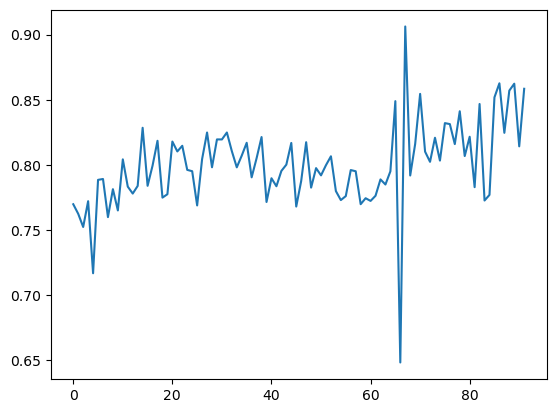

In [123]:
plt.plot(auc_list)

In [124]:
gini = 2*np.array(auc_list) - 1

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
linear = LinearRegression()

In [127]:
linear.fit(np.arange(92).reshape(-1,1), gini)

LinearRegression()

In [128]:
a = linear.coef_
b = linear.intercept_

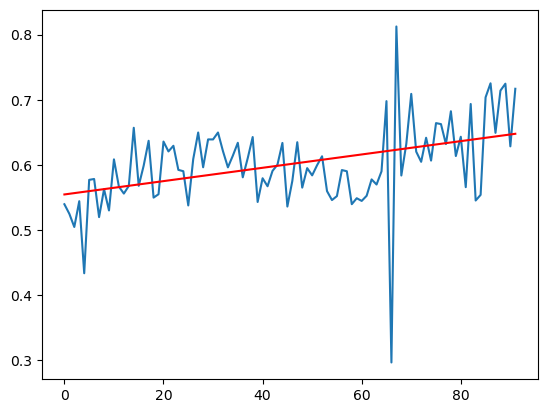

In [129]:
plt.plot(gini)
plt.plot(m*np.arange(92)+b, color='red')

In [130]:
gini.mean() + 88.0*min(0,a)-0.5*(gini-(m*np.arange(92)+b)).std()

0.5697651312748426